In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [9]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

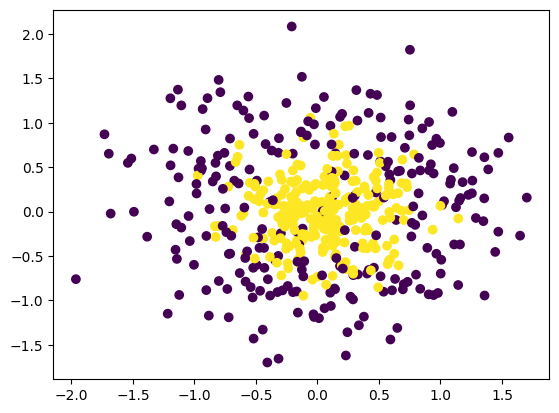

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)

Use AdaboostClassifier on the data without using hyperparameter tunning, model runs using default values like base_estimator = Decision tree, N_estimators = 50, learning_rate = 1, algorithms = SAMME

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
abc = AdaBoostClassifier()
np.mean(cross_val_score(abc, X, y, scoring='accuracy', cv=10))

0.786

After trainning the model Accuracy we got is 78%

In [13]:
abc.fit(X,y)

AdaBoostClassifier()

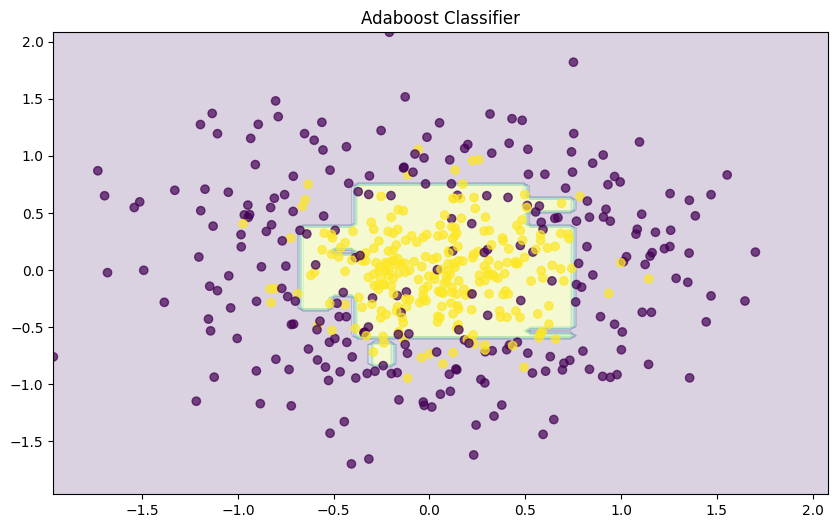

In [14]:
def plot_decision_boundary(clf):
  plt.figure(figsize=(10,6))
  x_range = np.linspace(X.min(), X.max(), 100)
  xx1, xx2 = np.meshgrid(x_range, x_range)
  y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
  y_hat = y_hat.reshape(xx1.shape)
  plt.contourf(xx1, xx2, y_hat, alpha=0.2)
  plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
  plt.title("Adaboost Classifier")
  plt.show()

plot_decision_boundary(abc)


There are some mistakes, some blue points in yellow region and viceversa

* n_estimators = 1 (decision stump, will devide whole data into one stump/ with one decion boundary, it will be a Case of underfitting)
* If you increase n_estimators value gradually, model will start to beacome more complex with more decision boundary. At one higher value it will overfit the model like n_estimators = 150  

* So you need to find an optimal value of n_estimators, using less value of learning_rate.
* here this happens (learning_rate * alpha)
* decreasing the learning_rate makes the coefficient (alpha) smaller. So it'll reduce the amplitude of sample weights at eachslip
* This translates into smaller variation of weighted data points & hence fewer differences between the weaker classifier decision boundaries.
* Idea is to slow down learning, allowing to dramatically reduce overfitting.

So by using learning_rate very intelligently you can overcome overfitting by using adaboost.

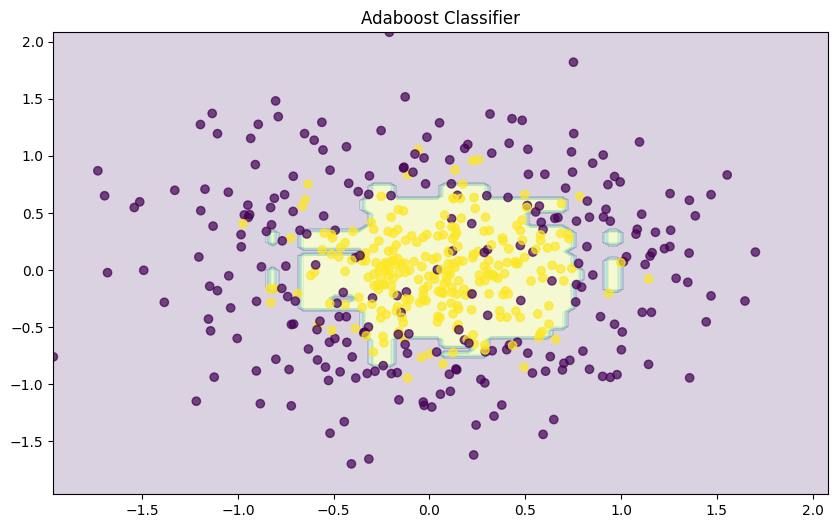

In [15]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

In [17]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}
